In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
#Generate some random data
np.random.seed(42)
X=np.random.rand(100, 10)
y=np.random.rand(100, 1)

In [3]:
#define a simple model
def create_model(loss):
    model= Sequential([
        Dense(64, input_dim=10, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss=loss, metrics=['mae'])
    return model

#list of loss function to demonstrate
loss_functions={
    'Mean Squared Error':'mean_squared_error',
    'Mean Absolute Error':'mean_absolute_error',
    'Mean Squared Logarithmic Error':'mean_squared_logarithmic_error',
    
}

In [4]:
#Training the model with different loss functions
history={}
for name, loss in loss_functions.items():
    print(f"Training with {name} loss function")
    model = create_model(loss)
    history[name]=model.fit(X, y, epochs=10, batch_size = 10, verbose=0)
    print( f"Finished training with {name} loss function\n")

Training with Mean Squared Error loss function


C:\Users\Priyanka\.conda\envs\priya\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished training with Mean Squared Error loss function

Training with Mean Absolute Error loss function
Finished training with Mean Absolute Error loss function

Training with Mean Squared Logarithmic Error loss function
Finished training with Mean Squared Logarithmic Error loss function



In [5]:
# plotting the results
import matplotlib.pyplot as plt

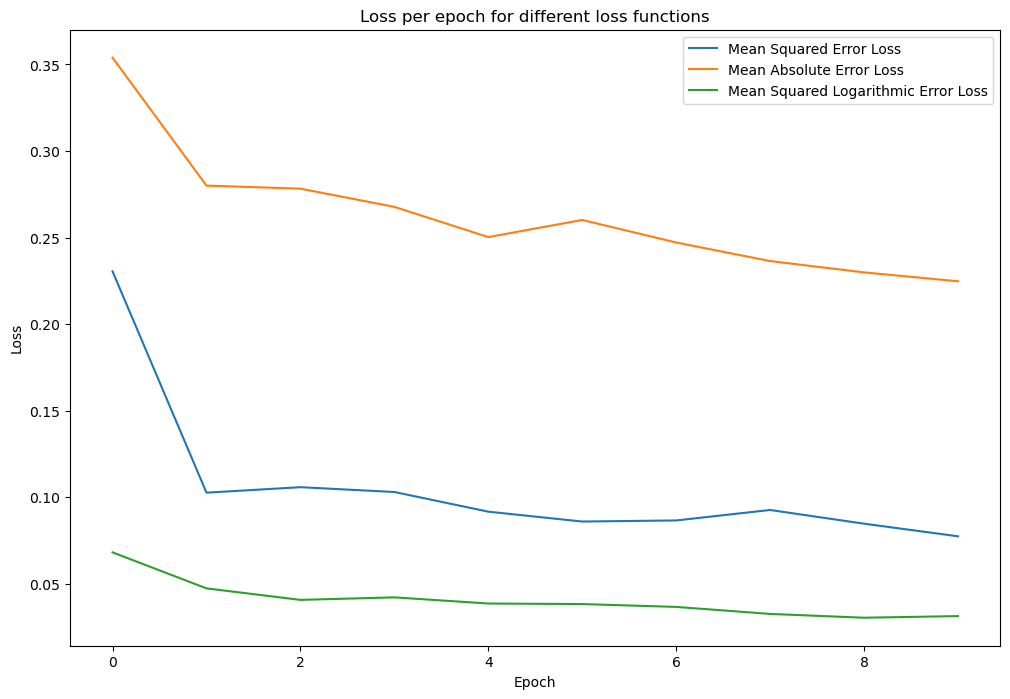

In [6]:
plt.figure(figsize=(12, 8))
for name in loss_functions.keys():
    plt.plot(history[name].history['loss'], label=f'{name} Loss')
plt.title('Loss per epoch for different loss functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()